In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
import random as rn

In [13]:
import h5py
X = h5py.File("faceimages.mat ",'r')
data=X.get('data')  

OSError: Unable to open file (unable to open file: name = 'faceimages.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [8]:
x=np.array(data)
x=x[:10304,:]
print(x.shape)  # 400 images with 10304 pixels in a image 

NameError: name 'data' is not defined

In [9]:
mean=np.mean(x,axis=1) #mean along the horizontal line with 10304 means 
print(mean.shape)
for i in range (400):
    x[:,i]=x[:,i]-mean
print(mean.shape)

NameError: name 'x' is not defined

In [2]:
cov_mat=np.cov(x)

NameError: name 'x' is not defined

In [0]:
print(cov_mat.shape)

(10304, 10304)


In [0]:
values, vectors = np.linalg.eig(cov_mat)

In [0]:
idx=values.argsort()[::-1] #reverse the values array
print(idx)
eigval=values[idx]
eigvec=vectors[:,idx]
eigvec=eigvec.transpose()

[  0   1   2 ... 405 402 400]


In [0]:
print(eigval.shape)
print(eigvec.shape)

(10304,)
(10304, 10304)


In [0]:
x_rec=np.array([np.zeros_like(x[:,0]),np.zeros_like(x[:,0]),np.zeros_like(x[:,0]),np.zeros_like(x[:,0])])

In [0]:
print(x_rec.shape)

(4, 10304)


In [0]:
y=np.matmul(eigvec, x)

In [0]:
print(y.shape)

(10304, 400)


In [0]:
x_rec[0] = np.matmul(eigvec.transpose()[:,:10304], y[:10304,0])
x_rec[1] = np.matmul(eigvec.transpose()[:,:400], y[:400,0])
x_rec[2] = np.matmul(eigvec.transpose()[:,:100], y[:100,0])
x_rec[3] = np.matmul(eigvec.transpose()[:,:50], y[:50,0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


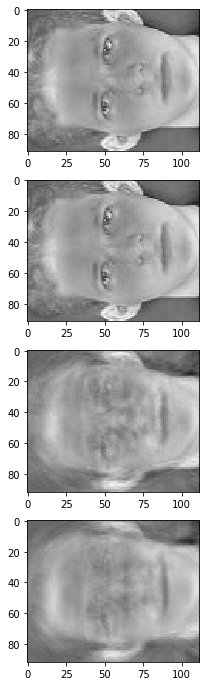

In [0]:
f,(axs1,axs2,axs3,axs4)=plt.subplots(4,1,figsize=(12,12))
temp=x_rec[0].reshape(92,112)
temp=np.real(temp)+137
axs1.imshow(np.real(temp),cmap='gray',vmin=0,vmax=255)
temp=x_rec[1].reshape(92,112)
temp=np.real(temp)+137
axs2.imshow(np.real(temp),cmap='gray',vmin=0,vmax=255)
temp=x_rec[2].reshape(92,112)
temp=np.real(temp)+137
axs3.imshow(np.real(temp),cmap='gray',vmin=0,vmax=255)
temp=x_rec[3].reshape(92,112)
temp=np.real(temp)+137
axs4.imshow(np.real(temp),cmap='gray',vmin=0,vmax=255)
plt.show()

In [0]:
e0 = np.linalg.norm(x[:,0] - x_rec[0])
e1 = np.linalg.norm(x[:,0] - x_rec[1])
e2 = np.linalg.norm(x[:,0] - x_rec[2])
e3 = np.linalg.norm(x[:,0] - x_rec[3])




In [0]:
print("error when all features are considered :",e0)
print("error when 400 features are considered :",e1)
print("error when 100 features are considered :",e2)
print("error when 50 features are considered :",e3)


error when all features are considered : 1.9562444410972776e-10
error when 400 features are considered : 1.9541039901244806e-10
error when 100 features are considered : 1360.3627731377176
error when 50 features are considered : 1652.3993204691326


In [0]:
x_recon = np.zeros((10304,10304))
for i in range (10304):
  x_recon[i] = np.matmul(eigvec.transpose()[:,:i], y[:i,0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
error =np.zeros((10304,1))
for j in range (10304):
  error[j] = np.linalg.norm(x[:,0] - x_recon[j])

As the number of features increases the error decreases


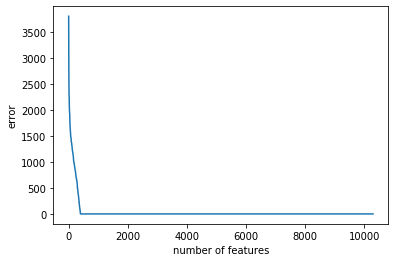

In [0]:
y_recon = np.arange(0,10304,1)
plt.plot(y_recon, error[:])
plt.xlabel('number of features')
plt.ylabel('error')
print("As the number of features increases the error decreases")